In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
sb.set_style('whitegrid')
import matplotlib.pyplot as plt
import sklearn

dataset = pd.read_csv('cleanedDataset.csv')
n_dataset = pd.read_csv('numercialDataset.csv')
hot_dataset = pd.read_csv('HotDataset.csv')
dataset


,Age,Primary streaming service,Hours per day,Fav genre,Foreign languages,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Mental health score
0,18.0,Spotify,4.0,Video game music,Yes,132.0,Never,Never,Very frequently,Never,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,26.0
1,61.0,YouTube Music,2.5,Jazz,Yes,84.0,Sometimes,Never,Never,Rarely,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,22.0
2,18.0,Spotify,4.0,R&B,No,107.0,Never,Never,Rarely,Never,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,23.0
3,18.0,Spotify,5.0,Jazz,Yes,86.0,Rarely,Sometimes,Never,Never,...,Very frequently,Very frequently,Very frequently,Never,8.0,8.0,7.0,7.0,Improve,30.0
4,18.0,YouTube Music,3.0,Video game music,Yes,66.0,Sometimes,Never,Rarely,Sometimes,...,Rarely,Never,Never,Sometimes,4.0,8.0,6.0,0.0,Improve,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,17.0,Spotify,2.0,Rock,Yes,120.0,Very frequently,Rarely,Never,Sometimes,...,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,22.0
590,18.0,Spotify,1.0,Pop,Yes,160.0,Rarely,Rarely,Never,Never,...,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,12.0
591,19.0,Other streaming service,6.0,Rap,No,120.0,Rarely,Sometimes,Sometimes,Rarely,...,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,8.0
592,19.0,Spotify,5.0,Classical,No,170.0,Very frequently,Never,Never,Never,...,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,8.0


In [2]:
n_dataset

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD,Mental health score,Primary streaming service,Fav genre,...,Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Music effects
0,18.0,4.0,132.0,7.0,7.0,10.0,2.0,26.0,4,15,...,3,0,2,2,1,0,1,1,3,1
1,61.0,2.5,84.0,9.0,7.0,3.0,3.0,22.0,5,6,...,2,3,2,0,2,2,0,0,0,0
2,18.0,4.0,107.0,7.0,2.0,5.0,9.0,23.0,4,12,...,3,2,2,0,2,3,3,0,1,0
3,18.0,5.0,86.0,8.0,8.0,7.0,7.0,30.0,4,6,...,3,1,3,1,3,3,3,3,0,0
4,18.0,3.0,66.0,4.0,8.0,6.0,0.0,18.0,5,15,...,0,1,1,1,1,1,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,17.0,2.0,120.0,7.0,6.0,0.0,9.0,22.0,4,14,...,0,2,1,1,3,0,1,3,0,0
590,18.0,1.0,160.0,3.0,2.0,2.0,5.0,12.0,4,11,...,0,0,1,0,3,0,0,2,2,0
591,19.0,6.0,120.0,2.0,2.0,2.0,2.0,8.0,2,13,...,1,1,2,1,2,2,2,1,1,0
592,19.0,5.0,170.0,2.0,3.0,2.0,1.0,8.0,4,0,...,0,0,0,0,0,0,0,0,2,0


In [3]:
hot_dataset

,Age,Hours per day,BPM,Anxiety,Depression,Insomnia,OCD,Mental health score,Primary streaming service_Apple Music,Primary streaming service_I do not use a streaming service.,...,Frequency [Rock]_Rarely,Frequency [Rock]_Sometimes,Frequency [Rock]_Very frequently,Frequency [Video game music]_Never,Frequency [Video game music]_Rarely,Frequency [Video game music]_Sometimes,Frequency [Video game music]_Very frequently,Music effects_Improve,Music effects_No effect,Music effects_Worsen
0,18.0,4.0,132.0,7.0,7.0,10.0,2.0,26.0,False,False,...,True,False,False,False,False,False,True,False,True,False
1,61.0,2.5,84.0,9.0,7.0,3.0,3.0,22.0,False,False,...,False,False,False,True,False,False,False,True,False,False
2,18.0,4.0,107.0,7.0,2.0,5.0,9.0,23.0,False,False,...,False,False,False,False,True,False,False,True,False,False
3,18.0,5.0,86.0,8.0,8.0,7.0,7.0,30.0,False,False,...,False,False,True,True,False,False,False,True,False,False
4,18.0,3.0,66.0,4.0,8.0,6.0,0.0,18.0,False,False,...,False,False,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,17.0,2.0,120.0,7.0,6.0,0.0,9.0,22.0,False,False,...,False,False,True,True,False,False,False,True,False,False
590,18.0,1.0,160.0,3.0,2.0,2.0,5.0,12.0,False,False,...,False,True,False,False,False,True,False,True,False,False
591,19.0,6.0,120.0,2.0,2.0,2.0,2.0,8.0,False,False,...,True,False,False,False,True,False,False,True,False,False
592,19.0,5.0,170.0,2.0,3.0,2.0,1.0,8.0,False,False,...,False,False,False,False,False,True,False,True,False,False


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import scale





In [5]:
#sb.pairplot(n_dataset)

In [6]:
print(n_dataset.corr())

                                   Age  Hours per day       BPM   Anxiety  \
Age                           1.000000      -0.087738  0.004859 -0.205720   
Hours per day                -0.087738       1.000000  0.043185  0.076648   
BPM                           0.004859       0.043185  1.000000  0.074798   
Anxiety                      -0.205720       0.076648  0.074798  1.000000   
Depression                   -0.087180       0.144600  0.060176  0.519389   
Insomnia                      0.003637       0.151470  0.062859  0.263219   
OCD                          -0.146933       0.117874 -0.008572  0.345836   
Mental health score          -0.152249       0.178596  0.068587  0.753181   
Primary streaming service    -0.089331       0.040548 -0.046571 -0.036598   
Fav genre                     0.018523      -0.025752  0.034100  0.068352   
Foreign languages            -0.105305       0.123299  0.036232  0.093336   
Frequency [Classical]         0.077097      -0.015205 -0.003452 -0.031174   

In [7]:
np.random.seed(42)
X = n_dataset.drop(['Mental health score', 'Anxiety', 'OCD','Depression', 'Insomnia', 'Primary streaming service', 'Foreign languages'], axis=1)
y = n_dataset['Mental health score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
X_train

,Age,Hours per day,BPM,Fav genre,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],...,Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Music effects
155,16.0,2.0,145.0,11,0,2,1,2,1,1,...,1,0,2,0,3,1,1,3,1,0
550,18.0,5.0,73.0,8,3,2,1,0,0,2,...,2,3,2,0,3,2,1,2,0,0
132,21.0,3.0,136.0,11,1,3,2,1,0,3,...,0,3,2,1,3,3,3,2,2,2
450,25.0,4.0,150.0,11,1,0,2,0,0,3,...,1,1,1,2,3,1,3,3,1,1
287,33.0,0.5,80.0,14,2,0,1,0,0,0,...,0,0,1,2,1,0,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,19.0,3.0,77.0,12,1,0,2,0,0,3,...,3,1,1,1,3,3,3,1,3,0
106,17.0,2.0,122.0,5,1,0,2,2,0,3,...,1,1,1,3,1,1,3,3,0,0
270,17.0,3.0,113.0,11,2,1,0,0,0,3,...,3,1,0,0,3,1,3,2,1,1
435,19.0,3.0,121.0,14,0,3,0,1,2,0,...,0,0,0,1,3,0,2,3,2,1


In [9]:
model = LinearRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [10]:
mse = mean_squared_error(y_test, y_predict)


r_squared = r2_score(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
rmse = mean_squared_error(y_test, y_predict, squared=False)

print("Mean Square Error:", mse)
print("R-squared:", r_squared)
print("Mean Absolute Error:", mae)
print("Root Mean Square Error:", rmse)
y_pred_test = model.predict(X_test)
print(y_pred_test)

Mean Square Error: 64.03927155313792
R-squared: 0.02660021288865655
Mean Absolute Error: 6.323278465656104
Root Mean Square Error: 8.002454095659527
[19.79850511 16.16435516 17.17178376 17.91370675 20.96070861 18.20976623
 17.00318869 14.59516269 18.61053145 14.40459795 18.0087595  16.5778357
 15.30484745 17.79209575 15.8021487  17.33882148 18.38236695 18.9183153
 16.54186128 17.24089895 19.29069184 16.39449124 18.45459995 17.96022135
 22.95437689 17.62192594 11.7001888  20.17896931 17.63327064 15.86994936
 17.39786704 16.61289728 20.82439784 15.73123999 17.20770653 21.25947067
 14.68445461 18.51364755 19.6945089  16.10337499 21.22806058 17.23710899
 18.80353309 18.1497239  18.34686113 14.13480534 19.01406917 18.36815508
 15.44912533 18.79058362 17.45635526 20.02726519 19.07691501 13.18776359
 17.96296299 18.66791539 21.92615771 18.76787096 19.6242141  21.25265356
 16.82807217 20.58483891 16.71362611 16.94513949 19.56332983 18.64993984
 19.40509314 16.84925142 15.60087192 16.41225607 2

In [11]:
reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_predict})
reg_model_diff

,Actual value,Predicted value
30,23.0,19.798505
299,29.0,16.164355
177,25.0,17.171784
204,18.0,17.913707
354,33.0,20.960709
...,...,...
580,19.0,18.796405
228,24.0,16.372962
84,7.0,17.765885
140,18.0,16.096480


In [12]:
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)

                         Feature  Coefficient
0                            Age    -0.131579
1                  Hours per day     0.343652
2                            BPM     0.007647
3                      Fav genre     0.047926
4          Frequency [Classical]     0.224253
5            Frequency [Country]    -0.097671
6                Frequency [EDM]     0.511382
7               Frequency [Folk]     0.692167
8             Frequency [Gospel]    -0.321456
9            Frequency [Hip hop]     0.071111
10              Frequency [Jazz]     0.155912
11             Frequency [K pop]    -0.138520
12             Frequency [Latin]     0.348993
13              Frequency [Lofi]    -0.101834
14             Frequency [Metal]     0.305830
15               Frequency [Pop]     0.447518
16               Frequency [R&B]     0.100338
17               Frequency [Rap]    -0.321261
18              Frequency [Rock]     0.374801
19  Frequency [Video game music]     0.073173
20                 Music effects  

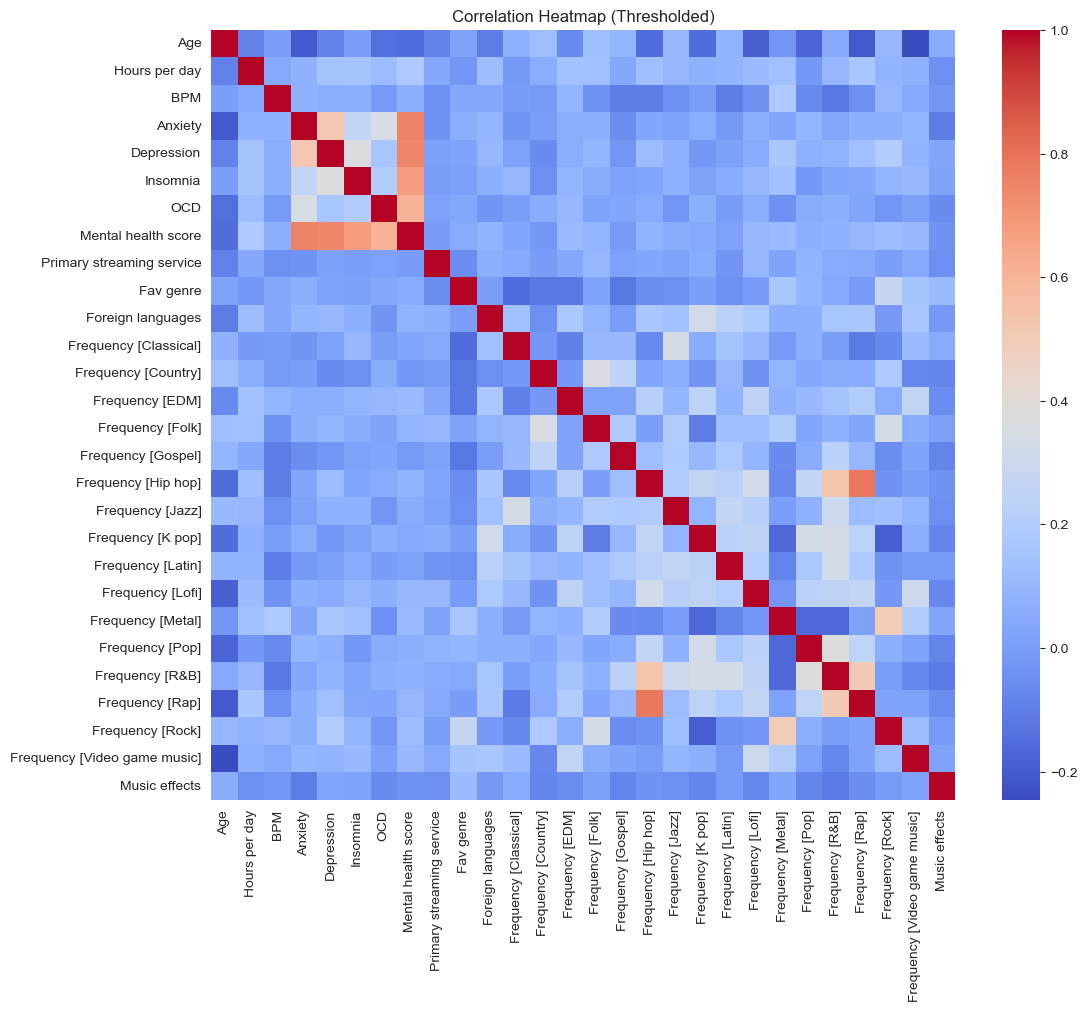

In [31]:
corr = n_dataset.corr()
threshold = 0.7
corr_filtered = corr[(corr >= threshold) | (corr <= threshold)]

plt.figure(figsize=(12,10))
sb.heatmap(n_dataset.corr(),cmap = 'coolwarm')
plt.title('Correlation Heatmap (Thresholded)')
plt.show()

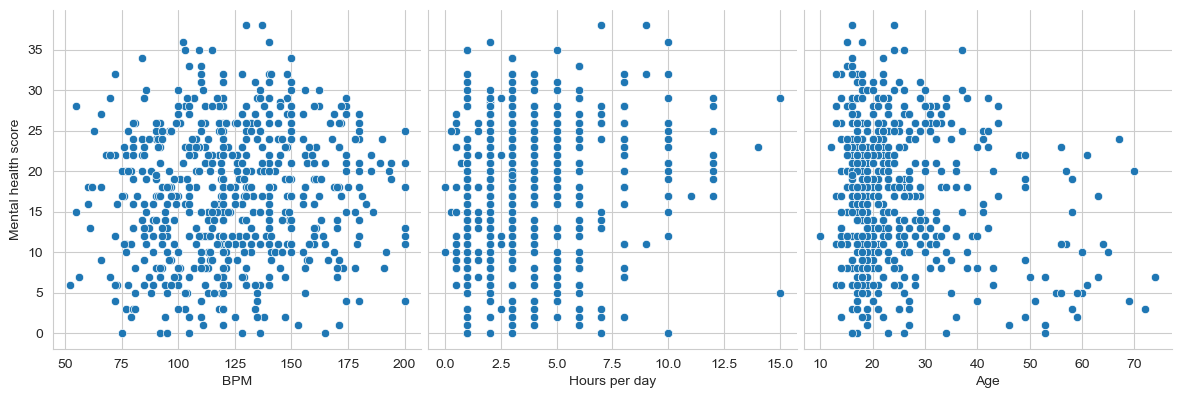

In [14]:
sb.pairplot(n_dataset, x_vars=['BPM', 'Hours per day', 'Age'], y_vars='Mental health score', height=4, aspect=1, kind='scatter')
plt.show()

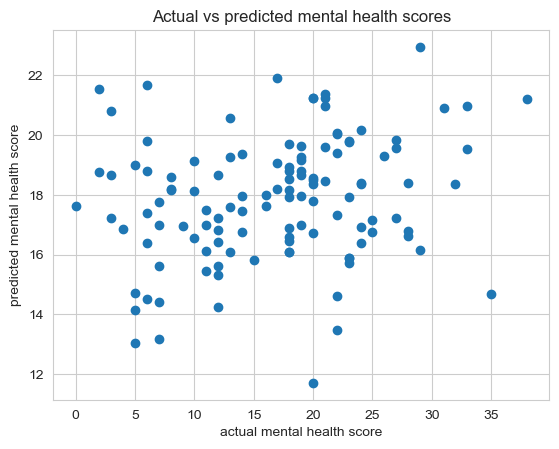

In [15]:
plt.scatter(y_test, y_predict)
plt.xlabel('actual mental health score')
plt.ylabel("predicted mental health score")
plt.title("Actual vs predicted mental health scores")
plt.show()

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, make_scorer

#Lasso model
lasso = Lasso()

#grid of hyperparameters 
param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]}

scorer = make_scorer(mean_squared_error, greater_is_better=False)

#grid search with cross-validation
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring=scorer, cv=5)
grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['alpha']
best_lasso = Lasso(alpha=best_alpha)

best_lasso.fit(X_train, y_train)

y_pred = best_lasso.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(" Lasso - Mean Squared Error:", mse)
print("Lasso - R-squared:", r2)


 Lasso - Mean Squared Error: 63.91864586613501
Lasso - R-squared: 0.02843372871732064


In [17]:
from sklearn.linear_model import ElasticNet
#Multiple linear regression refers to a linear regression model with more than one independent variable. In the case of Elastic Net regression, the model predicts the target variable by linearly combining multiple independent variables (features), just like in traditional multiple linear regression.from sklearn.linear_model import ElasticNet

# Elastic Net with hyperparameter tuning
elastic_net = ElasticNet()
param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0], 'l1_ratio': [0.1, 0.5, 0.7, 0.9]}
grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, scoring=scorer, cv=5)
grid_search.fit(X_train, y_train)
best_alpha = grid_search.best_params_['alpha']
best_l1_ratio = grid_search.best_params_['l1_ratio']
best_elastic_net = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio)
best_elastic_net.fit(X_train, y_train)
y_pred_elastic_net = best_elastic_net.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score

best_elastic_net.fit(X_train, y_train)

y_pred_elastic_net = best_elastic_net.predict(X_test)

mse_elastic_net = mean_squared_error(y_test, y_pred_elastic_net)

r2_elastic_net = r2_score(y_test, y_pred_elastic_net)

print("Elastic Net - Mean Squared Error:", mse_elastic_net)
print("Elastic Net - R-squared:", r2_elastic_net)


Elastic Net - Mean Squared Error: 62.535714237376
Elastic Net - R-squared: 0.04945435122559794


In [18]:
print(n_dataset.columns)

Index(['Age', 'Hours per day', 'BPM', 'Anxiety', 'Depression', 'Insomnia',
       'OCD', 'Mental health score', 'Primary streaming service', 'Fav genre',
       'Foreign languages', 'Frequency [Classical]', 'Frequency [Country]',
       'Frequency [EDM]', 'Frequency [Folk]', 'Frequency [Gospel]',
       'Frequency [Hip hop]', 'Frequency [Jazz]', 'Frequency [K pop]',
       'Frequency [Latin]', 'Frequency [Lofi]', 'Frequency [Metal]',
       'Frequency [Pop]', 'Frequency [R&B]', 'Frequency [Rap]',
       'Frequency [Rock]', 'Frequency [Video game music]', 'Music effects'],
      dtype='object')


In [19]:
print(X_train.columns)

Index(['Age', 'Hours per day', 'BPM', 'Fav genre', 'Frequency [Classical]',
       'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
       'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]',
       'Frequency [K pop]', 'Frequency [Latin]', 'Frequency [Lofi]',
       'Frequency [Metal]', 'Frequency [Pop]', 'Frequency [R&B]',
       'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]',
       'Music effects'],
      dtype='object')


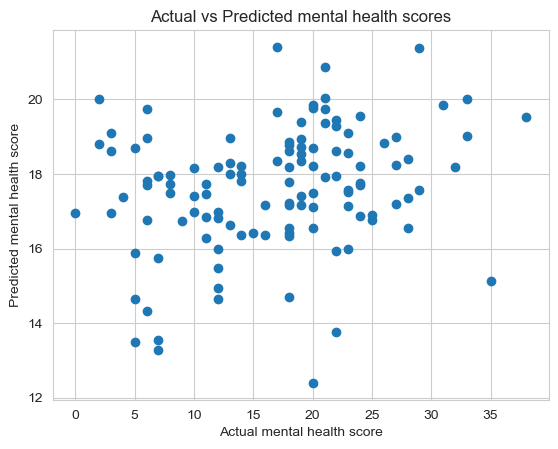

In [20]:
plt.scatter(y_test, y_pred_elastic_net)
plt.xlabel('Actual mental health score')
plt.ylabel("Predicted mental health score")
plt.title("Actual vs Predicted mental health scores")
plt.show()

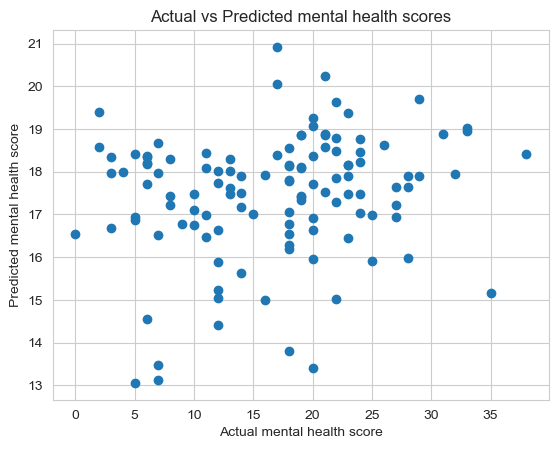

In [21]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual mental health score')
plt.ylabel("Predicted mental health score")
plt.title("Actual vs Predicted mental health scores")
plt.show()

In [22]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           594 non-null    float64
 1   Primary streaming service     594 non-null    object 
 2   Hours per day                 594 non-null    float64
 3   Fav genre                     594 non-null    object 
 4   Foreign languages             594 non-null    object 
 5   BPM                           594 non-null    float64
 6   Frequency [Classical]         594 non-null    object 
 7   Frequency [Country]           594 non-null    object 
 8   Frequency [EDM]               594 non-null    object 
 9   Frequency [Folk]              594 non-null    object 
 10  Frequency [Gospel]            594 non-null    object 
 11  Frequency [Hip hop]           594 non-null    object 
 12  Frequency [Jazz]              594 non-null    object 
 13  Frequ

In [23]:
print(n_dataset.columns)

Index(['Age', 'Hours per day', 'BPM', 'Anxiety', 'Depression', 'Insomnia',
       'OCD', 'Mental health score', 'Primary streaming service', 'Fav genre',
       'Foreign languages', 'Frequency [Classical]', 'Frequency [Country]',
       'Frequency [EDM]', 'Frequency [Folk]', 'Frequency [Gospel]',
       'Frequency [Hip hop]', 'Frequency [Jazz]', 'Frequency [K pop]',
       'Frequency [Latin]', 'Frequency [Lofi]', 'Frequency [Metal]',
       'Frequency [Pop]', 'Frequency [R&B]', 'Frequency [Rap]',
       'Frequency [Rock]', 'Frequency [Video game music]', 'Music effects'],
      dtype='object')


In [24]:
Z = n_dataset[['Frequency [Classical]','Age','Hours per day']]
p = n_dataset['Mental health score']
Z_train, Z_test, p_train, p_test = train_test_split(Z, p, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(Z_train, p_train)
y_predict = model.predict(Z_test)
mse = mean_squared_error(p_test, y_predict)


r_squared = r2_score(p_test, y_predict)

print("Mean Square Error:", mse)
print("R-squared:", r_squared)
p_pred_test = model.predict(Z_test)
print(p_pred_test)

Mean Square Error: 63.86848914805044
R-squared: 0.02919611307182124
[18.00761953 17.65684693 15.90342864 16.22273515 19.79250392 21.25928081
 18.02817474 17.08916669 17.34680759 12.81325292 15.4083249  15.71129886
 14.04596776 17.02667922 16.47028702 18.42087961 17.01741205 18.66925334
 17.56371523 15.83507479 18.81358448 17.78062287 17.49196059 17.56371523
 20.54726943 16.21144711 12.81829743 18.92607237 18.17130686 17.9769753
 18.89542814 15.71634337 17.83686682 18.00055414 16.73215057 18.5333675
 14.57171573 18.54465554 16.94483555 15.35630361 19.07040351 17.25367588
 18.06890799 17.85319937 17.6056475  12.94207337 18.54465554 18.08101789
 18.65714344 17.86246653 16.82105962 18.04753093 18.8115636  13.24082467
 17.08916669 18.0894632  20.99117373 18.74100798 19.22482368 20.42349349
 16.92345849 17.58509229 16.32677774 16.70150634 17.19238742 18.00761953
 19.62881659 18.65714344 15.68569914 15.46374699 19.81388098 15.63449971
 20.03078862 18.04753093 20.08198806 18.42087961 17.161743

In [25]:
def remove_outliers_iqr(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Remove outliers using IQR method (InterQuartile Range)
dataset = remove_outliers_iqr(n_dataset, 'BPM')

In [26]:
import statsmodels.api as sm
X1 = dataset[['BPM', 'Age']]
y1 = dataset['Mental health score']

Xc = sm.add_constant(X1)
model = sm.OLS(y1, X1).fit()
print(model.summary())
#as printed below for every 1 unit increase in BPM , there is a 0.1228
#in mental health score

                                 OLS Regression Results                                 
Dep. Variable:     Mental health score   R-squared (uncentered):                   0.785
Model:                             OLS   Adj. R-squared (uncentered):              0.784
Method:                  Least Squares   F-statistic:                              1078.
Date:                 Tue, 19 Mar 2024   Prob (F-statistic):                   4.53e-198
Time:                         11:08:01   Log-Likelihood:                         -2136.5
No. Observations:                  594   AIC:                                      4277.
Df Residuals:                      592   BIC:                                      4286.
Df Model:                            2                                                  
Covariance Type:             nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

Coefficient for BPM 0.018040715069901767


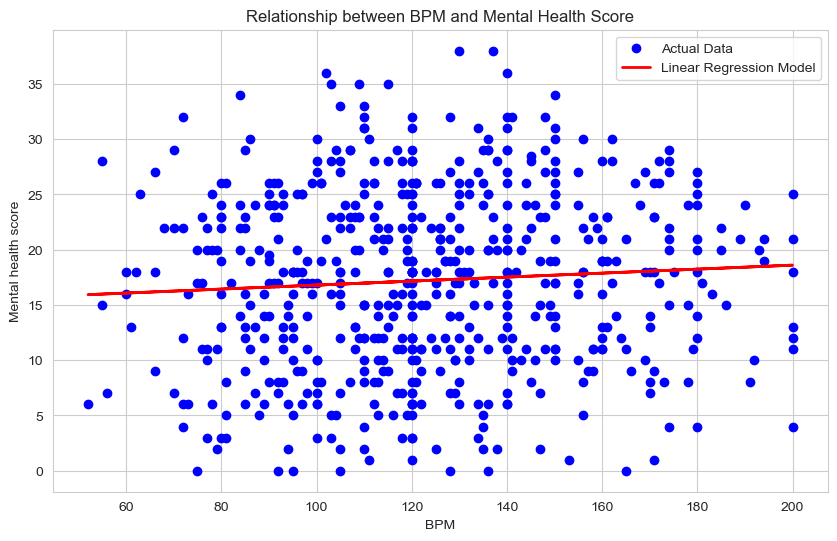

In [27]:
X2 = n_dataset[['BPM']]
y2 = n_dataset['Mental health score']

model = LinearRegression()
model.fit(X2, y2)

coef_bpm = model.coef_[0]
print("Coefficient for BPM", coef_bpm)

predicted_scores = model.predict(X2)

# Visualize the relationship between BPM and mental health scores
plt.figure(figsize=(10, 6))
plt.scatter(X2, y2, color='blue', label='Actual Data')
plt.plot(X2, predicted_scores, color='red', linewidth=2, label='Linear Regression Model')
plt.xlabel('BPM')
plt.ylabel('Mental health score')
plt.title('Relationship between BPM and Mental Health Score')
plt.legend()
plt.show()

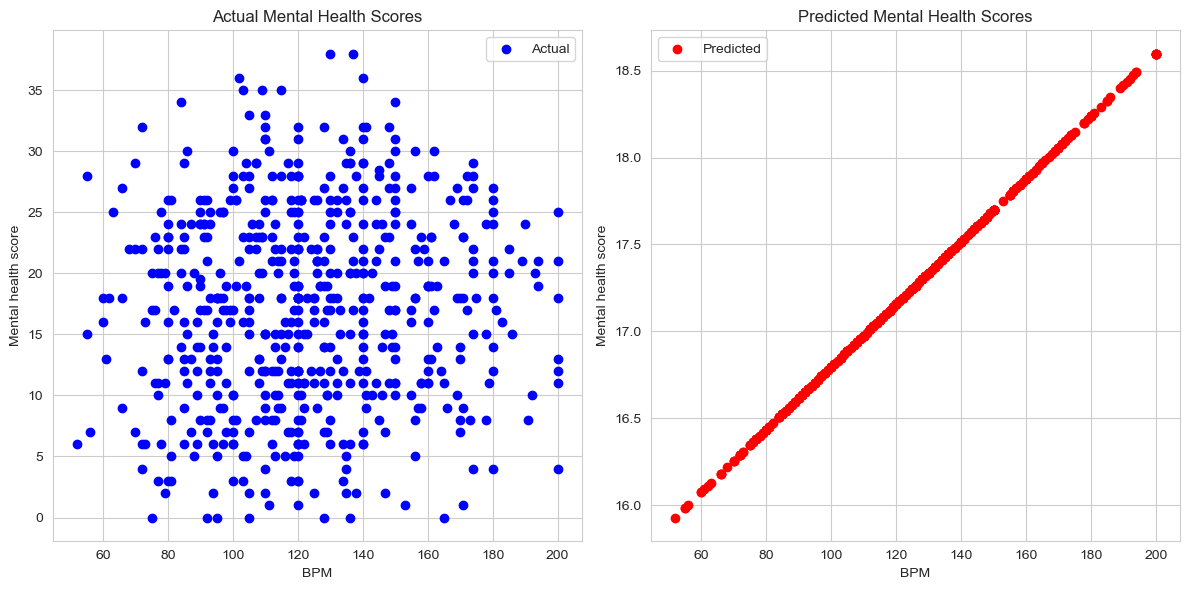

In [28]:
import matplotlib.pyplot as plt

predicted_scores = model.predict(X2)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X2, y2, color='blue', label='Actual')
plt.xlabel('BPM')
plt.ylabel('Mental health score')
plt.title('Actual Mental Health Scores')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X2, predicted_scores, color='red', label='Predicted')
plt.xlabel('BPM')
plt.ylabel('Mental health score')
plt.title('Predicted Mental Health Scores')
plt.legend()

plt.tight_layout()
plt.show()


In [29]:

mse = mean_squared_error(y2, predicted_scores)

r_squared = r2_score(y2, predicted_scores)

print("Mean Squared Error:", mse)
print("R-squared:", r_squared)

Mean Squared Error: 65.14290676484276
R-squared: 0.004704130307028209


In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

X_bpm = n_dataset[['BPM']]  
y = n_dataset['Mental health score']  

model = LinearRegression()
model.fit(X_bpm, y)
coef_bpm = model.coef_[0]
intercept = model.intercept_
predicted_scores_manual = intercept + coef_bpm * n_dataset['BPM']

mse_manual = mean_squared_error(n_dataset['Mental health score'], predicted_scores_manual)
r2_manual = r2_score(n_dataset['Mental health score'], predicted_scores_manual)

predicted_scores_sklearn = model.predict(X_bpm)

mse_sklearn = mean_squared_error(n_dataset['Mental health score'], predicted_scores_sklearn)
r2_sklearn = r2_score(n_dataset['Mental health score'], predicted_scores_sklearn)

print("Manual Prediction - Mean Squared Error:", mse_manual)
print("Manual Prediction - R-squared:", r2_manual)
print("Scikit-learn Prediction - Mean Squared Error:", mse_sklearn)
print("Scikit-learn Prediction - R-squared:", r2_sklearn)


Manual Prediction - Mean Squared Error: 65.14290676484276
Manual Prediction - R-squared: 0.004704130307028209
Scikit-learn Prediction - Mean Squared Error: 65.14290676484276
Scikit-learn Prediction - R-squared: 0.004704130307028209
